# Curitiba - Base do 156

Este é um modelo de iPython notebook que trata os dados do Curitiba 156. Este conterá algumas funcionalidades e visa servir como ponto de partida para quaisquer outras análises de dados.

In [1]:
import qgrid

import pandas as pd
import matplotlib.pyplot as plt

from curitiba_dados_abertos.datasources import DS156

# Leitura dos dados
Nesse momento os dados são importados por meio da biblioteca `curitiba-dados-abertos`, disponível no PyPI, onde ele trata de realizar todas as chamadas relativas ao datasource escolhido. No exemplo acima, usamos a base de dados do 156 (DS-156)

In [2]:
ds156 = DS156()  #Instancia o elemento DS156

ds156.get_info()

{'title': '156',
 'responsible_organization': 'Governo Municipal',
 'latest_csv_url': 'http://dadosabertos.c3sl.ufpr.br/curitiba/156//2020-02-01_156_-_Base_de_Dados.csv'}

A Função abaixo importa o dataframe direto no Pandas. Ele faz o download da base de dados, e já o carrega prontamente. Este pode receber um parâmetro `date_prefix` onde o mesmo recebe uma data no formato disponibilizado pelo portal da transparência. Caso esse parâmetro seja `None` o mesmo fará o download do último arquivo disponibilizado. 

A listagem dos itens disponíveis pode ser acessível por meio do método `ds156.list_available_items()`.

In [3]:
data = ds156.get_pandas_dataframe(date_prefix=None)

In [4]:
ds156.list_available_items()

['2016-09-01',
 '2016-10-01',
 '2016-11-01',
 '2016-12-01',
 '2017-01-01',
 '2017-02-01',
 '2017-03-01',
 '2017-04-01',
 '2017-06-01',
 '2017-07-01',
 '2017-08-01',
 '2017-09-01',
 '2017-10-01',
 '2017-11-01',
 '2017-12-01',
 '2018-01-01',
 '2018-02-01',
 '2018-03-01',
 '2018-04-01',
 '2018-04-26',
 '2018-05-01',
 '2018-06-01',
 '2018-07-01',
 '2018-08-01',
 '2018-09-01',
 '2018-10-01',
 '2018-11-01',
 '2018-12-01',
 '2019-01-01',
 '2019-02-01',
 '2019-03-01',
 '2019-04-01',
 '2019-05-01',
 '2019-07-01',
 '2019-08-01',
 '2019-09-01',
 '2019-10-01',
 '2019-11-01',
 '2019-12-01',
 '2020-01-01',
 '2020-02-01']

# Apresentação dos dados
Nesse momento o dataset foi minimamente limpo e já está pronto para utilização. Os dados para limpeza dos dados se encontram na seguinte URL [](https://github.com/CodeForCuritiba/curitiba-dados-abertos/blob/master/curitiba_dados_abertos/datasources/ds_156.py#L9-L15)

Agora será realizado tarefas de seleção de pedaços do dataset.

## Dado separado por assunto

In [5]:
data_assunto = data[['ASSUNTO']].groupby(['ASSUNTO']).size().reset_index(name='counts').sort_values(['counts'], ascending=False)
qgrid.show_grid(data_assunto, show_toolbar=True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Organização por tipo de órgão


In [6]:
data_orgaos = data[['ORGAO']].groupby(['ORGAO']).size().reset_index(name='counts').sort_values(['counts'], ascending=False)
qgrid.show_grid(data_orgaos)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

# Visualização do Grid inteiro

In [9]:
qgrid.show_grid(data, show_toolbar=True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Gráfico de solicitação por Bairro

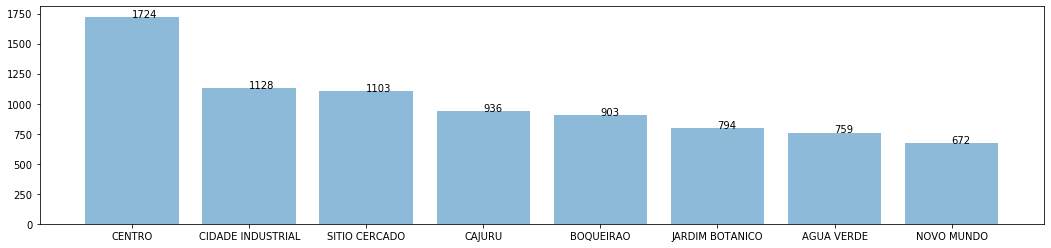

In [18]:
data_top_bairros = data.groupby('BAIRRO_ASS')['BAIRRO_ASS'] \
                    .count().reset_index(name='count') \
                    .sort_values(['count'], ascending=False).head(8)

plt.figure(figsize=(18,4))
plt.bar(data_top_bairros['BAIRRO_ASS'], data_top_bairros['count'], align='center', alpha=0.5)

for a,b in zip(data_top_bairros['BAIRRO_ASS'], data_top_bairros['count']):
    plt.text(a, b, str(b))

plt.show()